In [36]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression(random_state=0, solver='lbfgs', max_iter=10000, C=2.5)
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import pickle
file_name = "Log_model.sav"
cls = pickle.load(open(file_name, "rb"))
file_name = "tfidf.sav"
tfidf = pickle.load(open(file_name, "rb"))
Sample_correct = ["this is good .", 1]
Sample_misclassify = ["nothing is wrong .", 1]
Sample_incorrect = ["this is not good .", 0]

In [37]:
def ngrams(input, n):
  input = input.split(' ')
  output = []
  for i in range(len(input)-n+1):
    output.append(input[i:i+n])
  return output

In [38]:
#input sentence
Sample = Sample_misclassify

In [39]:
example_sentence_word = Sample[0].split(" ")
example_sentence = [' '.join(x) for x in ngrams(Sample[0], 2)]
example_sentence += example_sentence_word
test = tfidf.transform([Sample[0]])
example_sentence = tfidf.inverse_transform(test)[0]
test_y = cls.predict(test)
feature_to_weight = dict()
coeffcients = cls.coef_[0]
index_list = []
feature_name = tfidf.get_feature_names()
for i, j in enumerate(feature_name):
    feature_to_weight[j] = i

output = ""
prediction = cls.predict(test)
confidence = cls.predict_proba(test)[0][cls.predict(test)]
output += "Prediction: %d with confidence %f. " % (cls.predict(test), cls.predict_proba(test)[0][cls.predict(test)])
output += "Predictor thinks words: "
important_word = []
if prediction == 1:
    for w in example_sentence:
        if cls.coef_[0][feature_to_weight[w]] > 0:
            important_word.append(w)
    for w in important_word:
        output += '(' + w +  '), '
    output += "is important, thus it predicted Positive. "
else:
    for w in example_sentence:
        if cls.coef_[0][feature_to_weight[w]] < 0:
            important_word.append(w)
    for w in important_word:
        output += '(' + w +  '), '
    output += "is important, thus it predicted Negative. "
if prediction == Sample[1]:
    output += "Fortunately, it's correct. "
else:
    output += "Unfortunately, it's incorrect. "
    output += "It may be because "
    important_word = []
    if prediction == 0:
        for w in example_sentence:
            if cls.coef_[0][feature_to_weight[w]] > 0:
                important_word.append(w) 
        for w in important_word:
            output += '(' + w +  '), '
        output += " has not enough positive weight to make the sentence Positive "
    else:
        for w in example_sentence:
            if cls.coef_[0][feature_to_weight[w]] < 0:
                important_word.append(w) 
        for w in important_word:
            output += '(' + w +  '), '
        output += " has not enough negative weight to make the sentence Negative "
    output += "or we have double negation which is hard to classify."
print(output)

Prediction: 0 with confidence 0.705951. Predictor thinks words: (wrong .), (wrong), (nothing), (is wrong), (.), is important, thus it predicted Negative. Unfortunately, it's incorrect. It may be because (nothing is), (is),  has not enough positive weight to make the sentence Positive or we have double negation which is hard to classify.


In [40]:


weights = []

print(example_sentence)

for i, w in enumerate(example_sentence):
    index = feature_to_weight.get(w, -1)
    if index == -1:
        weights.append(0.0)
    else:
        weights.append(coeffcients[index])
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = example_sentence
y_pos = np.arange(len(objects))
performance = weights

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Weight')
plt.title('Weight of words')

plt.show()



['wrong .' 'wrong' 'nothing is' 'nothing' 'is wrong' 'is' '.']


In [41]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
temp = pickle.load(open("Log_model.sav", "rb"))

test_ = tfidf.transform([Sample[0]])
a = widgets.FloatText(value =temp.predict_proba(test_)[0][temp.predict(test_)], description='Confidence:' )
b = widgets.Text(value = "Positive" if temp.predict(test_)== 1 else "Negative" , description='Predicted:' )

def on_value_change(change):
    temp.coef_[0][feature_to_weight[change['owner'].description]] = change['new']
    b.value = value = "Positive" if temp.predict(test_)== 1 else "Negative"
    a.value = temp.predict_proba(test_)[0][temp.predict(test_)]

kwarg = {}
for w in example_sentence:
    kwarg[w] = widgets.FloatSlider(min= -10.0,max=10.0,step=0.01,value=temp.coef_[0][feature_to_weight[w]], orientation='horizontal', description=w)
    kwarg[w].observe(on_value_change, names = 'value')

output = []
for w in kwarg:
    output.append(kwarg[w])

display(*output)
display(b)
display(a)



FloatSlider(value=-0.06286233591114954, description='wrong .', max=10.0, min=-10.0, step=0.01)

FloatSlider(value=-0.7160459365577988, description='wrong', max=10.0, min=-10.0, step=0.01)

FloatSlider(value=0.02115039701773318, description='nothing is', max=10.0, min=-10.0, step=0.01)

FloatSlider(value=-1.8103260924289202, description='nothing', max=10.0, min=-10.0, step=0.01)

FloatSlider(value=-0.2972544898886029, description='is wrong', max=10.0, min=-10.0, step=0.01)

FloatSlider(value=1.846839462633557, description='is', max=10.0, min=-10.0, step=0.01)

FloatSlider(value=-0.37568028090544997, description='.', max=10.0, min=-10.0, step=0.01)

Text(value='Negative', description='Predicted:')

FloatText(value=0.7059513042650627, description='Confidence:')

In [42]:
file_path = './part2_cls/'
class_name = ['identity_hate', 'insult', 'threat', 'obscene', 'severe_toxic', 'toxic']
cls = dict()
for name in class_name:
    file_name = file_path + name + '.sav'
    cls[name] = pickle.load(open(file_name, 'rb'))
vectorizer = pickle.load(open('./part2_cls/vector_p2.sav', 'rb'))
feature_to_index_part2 = dict()
feature_name_part2 = vectorizer.get_feature_names()
for i, j in enumerate(feature_name_part2):
    feature_to_index_part2[j] = i

In [43]:
example_sentence = ["Fuck you, block me, you faggot pussy!"]
example_vec = vectorizer.transform([example_sentence[0]])
example_sentence = vectorizer.inverse_transform(example_vec)[0]

<IPython.core.display.Javascript object>


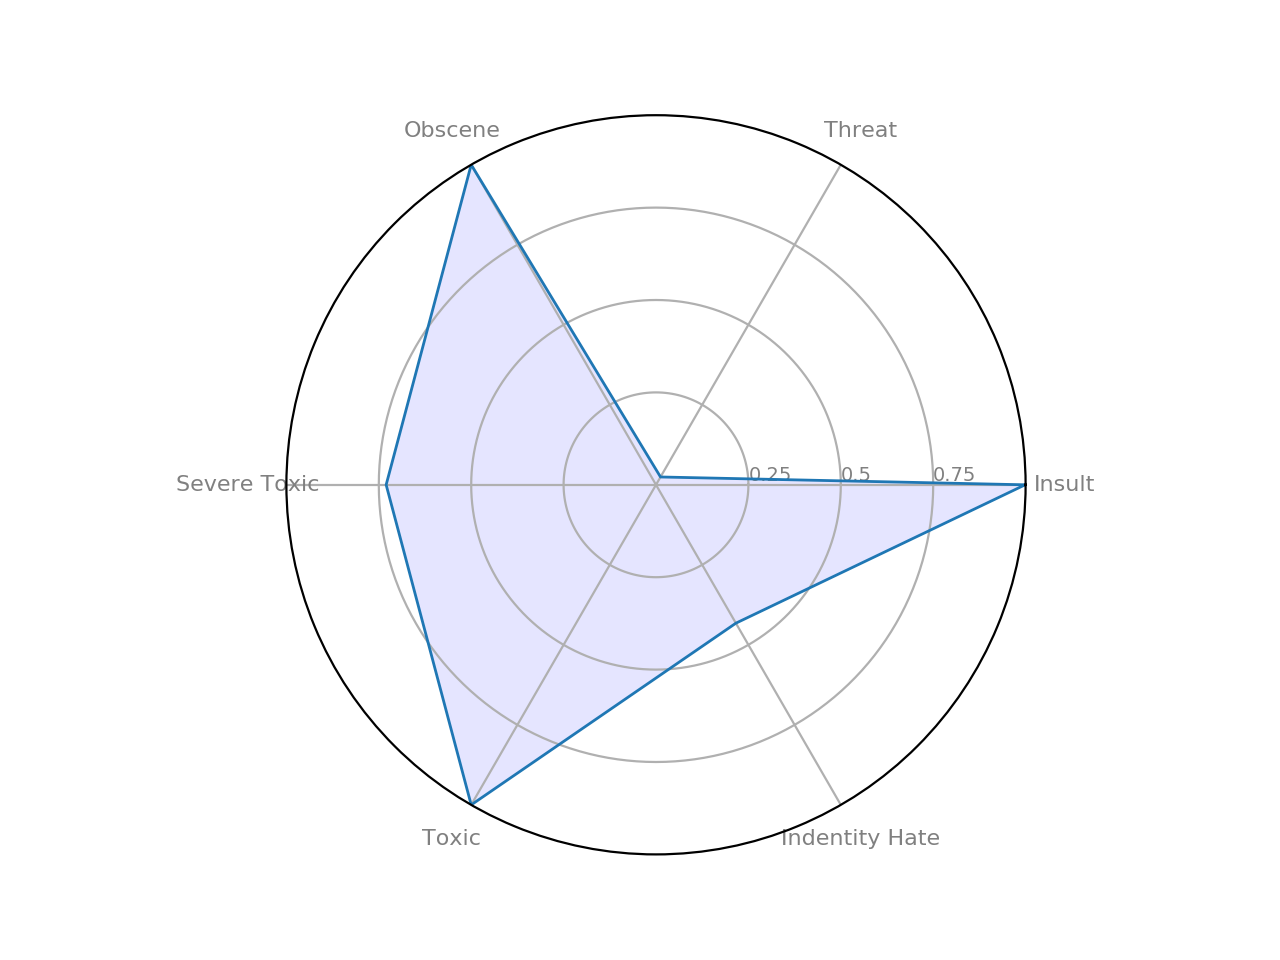

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['Radar Chart'],
'Insult': [cls['insult'].predict_proba(example_vec)[0][1]],
'Threat': [cls['threat'].predict_proba(example_vec)[0][1]],
'Obscene': [cls['obscene'].predict_proba(example_vec)[0][1]],
'Severe Toxic': [cls['severe_toxic'].predict_proba(example_vec)[0][1]],
'Toxic': [cls['toxic'].predict_proba(example_vec)[0][1]],
'Indentity Hate': [cls['identity_hate'].predict_proba(example_vec)[0][1]]
})
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.25,0.5,0.75], ["0.25","0.5","0.75"], color="grey", size=7)
plt.ylim(0,1)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)


<IPython.core.display.Javascript object>


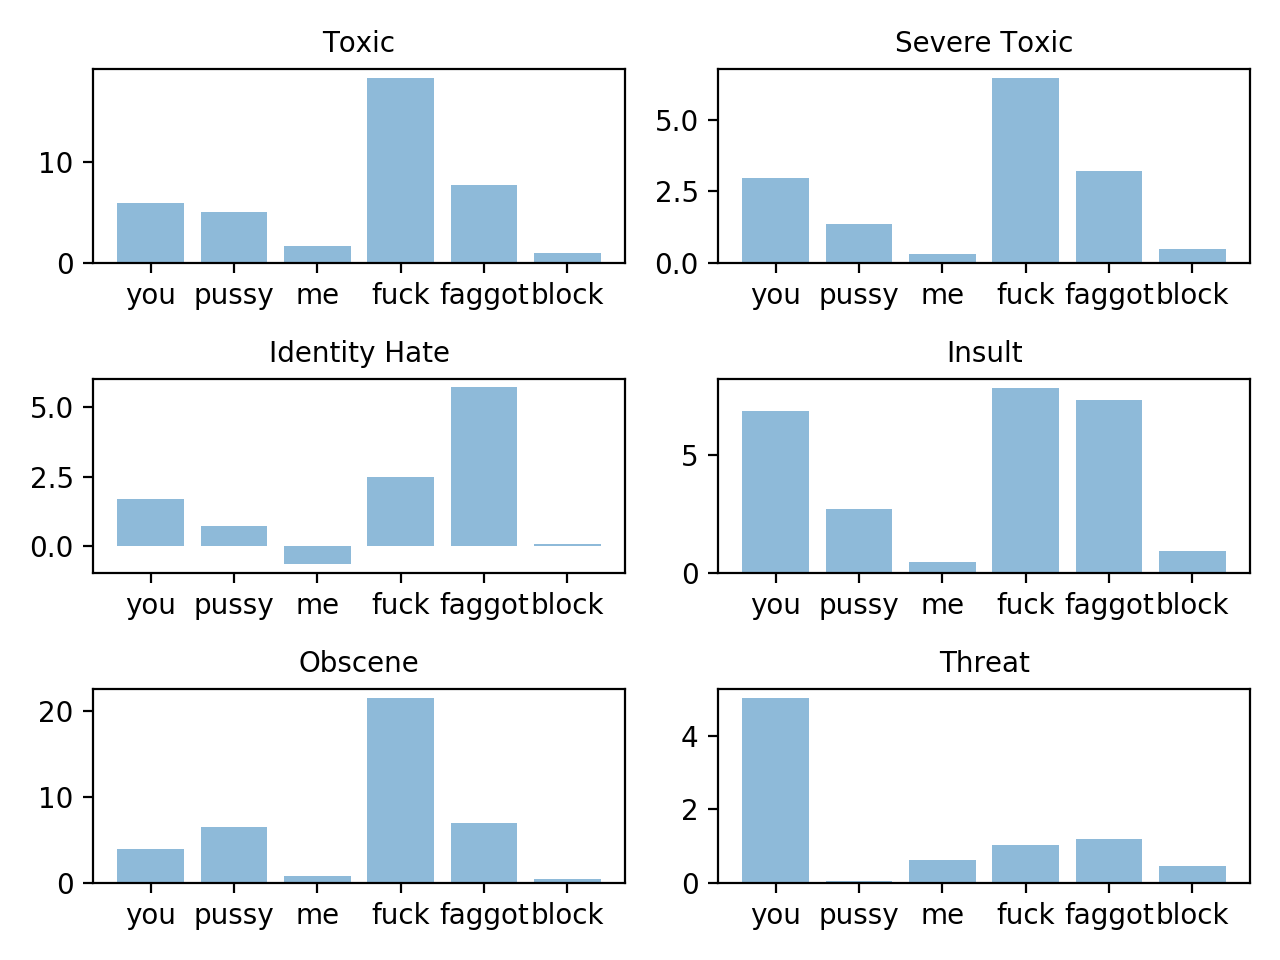

"\nplt.clf()\nplt.bar(y_pos, performance, align='center', alpha=0.5)\nplt.xticks(y_pos, objects)\nplt.ylabel('Weight')\nplt.title('Weight of words')\n\nplt.show()\n"

In [45]:
weights = dict()

for name in class_name:
    weights[name] = []
    coef = cls[name].coef_[0]
    for word in example_sentence:
        if feature_to_index_part2.get(word, -1) != -1:
            weights[name].append(coef[feature_to_index_part2.get(word, -1)])
        else:
            weights[name].append(0.0)
#print(weights)

import matplotlib.pyplot as plt; 
#plt.rcdefaults()
import numpy as np


objects = example_sentence

y_pos = np.arange(len(objects))
performance = weights
fig, axs = plt.subplots(3, 2, sharex=False, sharey=False)
axs[0,0].bar(objects, performance['toxic'], align='center', alpha=0.5)
axs[0,0].set_title("Toxic", fontsize = 10)
axs[0,1].bar(objects, performance['severe_toxic'], align='center', alpha=0.5)
axs[0,1].set_title("Severe Toxic", fontsize = 10)
axs[1,0].bar(objects, performance['identity_hate'], align='center', alpha=0.5)
axs[1,0].set_title("Identity Hate", fontsize = 10)
axs[1,1].bar(objects, performance['insult'], align='center', alpha=0.5)
axs[1,1].set_title("Insult", fontsize = 10)
axs[2,0].bar(objects, performance['obscene'], align='center', alpha=0.5)
axs[2,0].set_title("Obscene", fontsize = 10)
axs[2,1].bar(objects, performance['threat'], align='center', alpha=0.5)
axs[2,1].set_title("Threat", fontsize = 10)
fig.tight_layout()


'''
plt.clf()
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Weight')
plt.title('Weight of words')

plt.show()
'''